In this code I will verify the $1-\alpha$ confidence interval obtained from Hoeffding's inequality. For a given $\alpha$, if $X_1, X_2, \cdots, X_n$ are independent samples of Bernouuli(p), then
$$
p \in C_n = [\bar{X_n} - \epsilon_n, \bar{X_n} + \epsilon]
$$
at least $1-\alpha$ of the times. In this formula:
$$
\bar{X_n} = \frac{1}{n}\sum_{i=1}^{n}X_i
$$
and $\epsilon_n = \sqrt{\frac{1}{2n}\log{\frac{2}{\alpha}}}$.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# Number of iterations
Niter = 100
# Number of samples
n = np.arange(10,10000,100)
# Confidence interval
alpha = 0.05
p= 0.5

In [83]:
epsilon = np.sqrt(np.log(2/alpha)/(2*n))
epsilon

array([0.42946941, 0.1294899 , 0.09371791, 0.07713498, 0.06707185,
       0.06013775, 0.05498792, 0.05096864, 0.04771882, 0.04502063,
       0.0427338 , 0.04076343, 0.03904267, 0.03752292, 0.03616785,
       0.03494972, 0.03384693, 0.03284235, 0.03192221, 0.03107532,
       0.03029244, 0.02956589, 0.02888924, 0.02825701, 0.02766456,
       0.02710787, 0.02658349, 0.02608841, 0.02562   , 0.02517594,
       0.02475421, 0.02435298, 0.02397064, 0.02360577, 0.02325707,
       0.02292338, 0.02260365, 0.02229694, 0.02200238, 0.0217192 ,
       0.02144668, 0.02118416, 0.02093106, 0.02068681, 0.02045092,
       0.02022292, 0.02000238, 0.01978891, 0.01958212, 0.01938168,
       0.01918728, 0.01899861, 0.0188154 , 0.01863738, 0.01846433,
       0.01829601, 0.01813221, 0.01797274, 0.01781739, 0.01766601,
       0.01751842, 0.01737447, 0.01723401, 0.01709691, 0.01696302,
       0.01683223, 0.01670442, 0.01657948, 0.0164573 , 0.01633779,
       0.01622084, 0.01610636, 0.01599428, 0.0158845 , 0.01577

In [84]:
Portion = []
for i, eps in zip(n,epsilon):
    X = np.random.binomial(1,p, size = (Niter,i))
    M = X.mean(axis = 1)
    counter = np.sum(np.logical_and(p > M - eps, p < M + eps))
    Portion.append(counter/Niter)

In [85]:
P = pd.DataFrame(data = Portion , columns = ['Inside_P'])

In [86]:
P.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Inside_P,100.0,0.992,0.008762,0.96,0.99,0.99,1.0,1.0


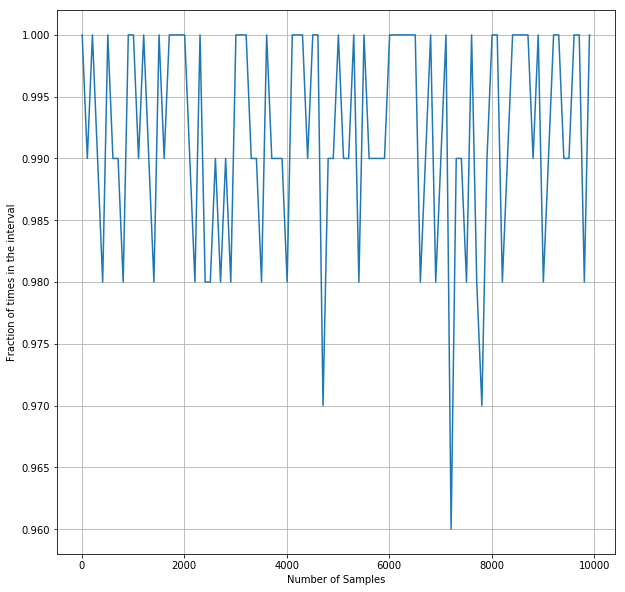

In [87]:
plt.figure(figsize = (10,10))
plt.xlabel('Number of Samples')
plt.ylabel('Fraction of times in the interval')
plt.grid()
plt.plot(n, P.loc[:,'Inside_P'])
plt.show()

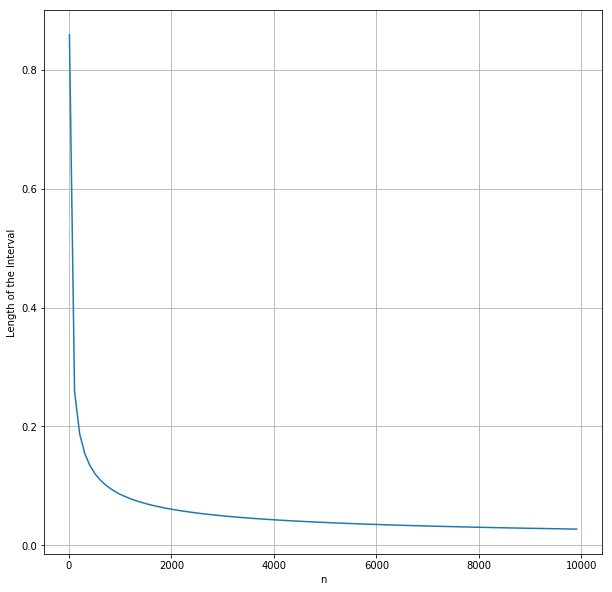

In [90]:
Interval_Length = 2*epsilon
plt.figure(figsize = (10,10))
plt.grid()
plt.xlabel('n')
plt.ylabel('Length of the Interval')
plt.plot(n,Interval_Length)
plt.show()